# Predicción de Movimiento en el Precio de Acciones con Regresión Logística

Regresión Logística aplicada al conjunto de datos el cual contiene información histórica del mercado de valores extraída de Yahoo Finance, abarcando un período de cinco años. Incluye registros diarios del desempeño bursátil de las 500 principales compañías según su capitalización de mercado.


Tipos de datos después de limpiar:
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

📈 Accuracy: 0.5377094856252022

📋 Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.55      0.31      0.40     58824
           1       0.53      0.75      0.62     61769

    accuracy                           0.54    120593
   macro avg       0.54      0.53      0.51    120593
weighted avg       0.54      0.54      0.51    120593


🧪 Importancia de las variables (coeficientes):
  Variable   Coeficiente
3    Close -3.281570e-15
1     High  1.192121e-15
2      Low  1.174978e-15
0     Open  9.763099e-16
4   Volume  3.963794e-23


C:\Users\Luis D Peñaranda\AppData\Local\Temp\ipykernel_34012\4083807375.py:72: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
C:\Users\Luis D Peñaranda\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


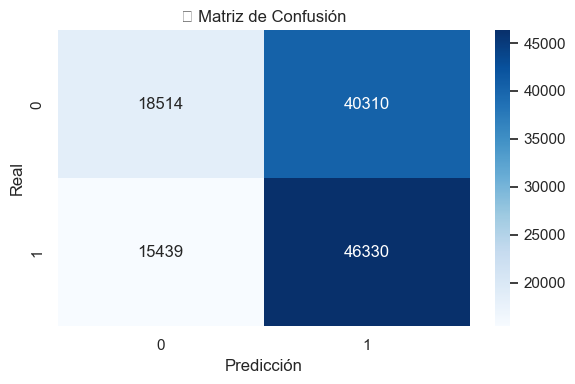

In [1]:
# 📦 Cargar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 🎨 Estilo visual
sns.set(style="darkgrid")

# 📁 Cargar datos desde archivo Excel
df = pd.read_excel(
    r"C:\Machine_Learning\jbook_ml2025\docs\datos\stock_details_5_years_edit.xlsx",
    engine='openpyxl'
)

# 🧹 Limpiar columnas numéricas con comas como separadores de miles
cols_to_clean = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in cols_to_clean:
    df[col] = df[col].astype(str).str.replace(',', '')  # Elimina comas
    df[col] = pd.to_numeric(df[col], errors='coerce')    # Convierte a numérico

# ✅ Verificar tipos de datos
print("\nTipos de datos después de limpiar:")
print(df[cols_to_clean].dtypes)

# 🧼 Eliminar filas con valores faltantes
df = df.dropna(subset=cols_to_clean)

# 🎯 Crear variable objetivo: ¿sube el precio al día siguiente?
df["Target"] = df.groupby("Company")["Close"].shift(-1) > df["Close"]
df["Target"] = df["Target"].astype(int)
df = df.dropna(subset=["Target"])

# 🧠 Entrenamiento del modelo
features = cols_to_clean
X = df[features]
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 📊 Evaluación del modelo
y_pred = model.predict(X_test)

print("\n📈 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# 🔍 Mostrar coeficientes del modelo
coef_df = pd.DataFrame({
    'Variable': features,
    'Coeficiente': model.coef_[0]
}).sort_values(by='Coeficiente', key=abs, ascending=False)

print("\n🧪 Importancia de las variables (coeficientes):")
print(coef_df)

# 🧯 Matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("🔍 Matriz de Confusión")
plt.tight_layout()
plt.show()


## Análisis

A partir de los resultados obtenidos, se observa que el modelo de regresión logística alcanza una precisión de 0.54, lo cual indica un desempeño apenas superior al azar. La matriz de confusión refuerza esta observación:

El modelo logra identificar correctamente 46,330 casos positivos (1) y 18,514 negativos (0).

Sin embargo, también se presentan errores significativos: predice incorrectamente 40,310 negativos como positivos y 15,439 positivos como negativos.

Este desequilibrio muestra que el modelo tiene una alta tasa de falsos positivos, lo cual es preocupante si se desea hacer predicciones fiables sobre el comportamiento futuro de las acciones. Aunque el recall para la clase 1 es relativamente alto (0.75), la f1-score general (0.51) es baja, confirmando que el modelo no tiene una capacidad predictiva sólida en este contexto.

## Conclusión

El modelo no es adecuado para predecir movimientos bursátiles con precisión aceptable. Este resultado sugiere que las variables utilizadas (Open, High, Low, Close, Volume, etc.) podrían no ser suficientes para capturar la complejidad del mercado financiero, o que se requiere un modelo más robusto, posiblemente no lineal, como Random Forest o redes neuronales.